# Assignment 1
## Setup

In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits import mplot3d
from types import SimpleNamespace
from consav.linear_interp import interp_2d

#Toggle warnings
import warnings
warnings.filterwarnings('ignore', message='Mean of empty slice')


# load local model file and initialize model class
from DynLaborFertModel import DynLaborFertModelClass

# Load local tools file
from tools import marshall_long, marshall_short, plot_compare_behavior, plot_compare_marshall

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
#Settings
id = 53 #Main model id
dtau = 0.1 #Relative change in tax rate
load = False #Whether to load previous model solutions

In [20]:
#Initialize model bank
modelbank = {}

## Question 1

In [21]:
for id in [53]:
    modelbank[id] = {}
    if load:
        modelbank[id]['baseline'] = model = DynLaborFertModelClass(name=f'Q1_{id}', load=True)
    else:
        b1 = id / 1000
        modelbank[id]['baseline'] = model = DynLaborFertModelClass(name=f'Q1_{id}',par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': b1})
        model.solve()
        model.simulate()
        model.save()
    
    #Response of h to a birth for different values of beta_1
    response = np.mean(model.sim.h[model.sim.time_since_birth==0])/np.mean(model.sim.h[model.sim.time_since_birth==-1]) -1
    print(f'beta_1 = {model.par.beta_1:.3f}', f'avg_response = {response:.2%}')

/Users/ahj/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


beta_1 = 0.053 avg_response = -10.03%


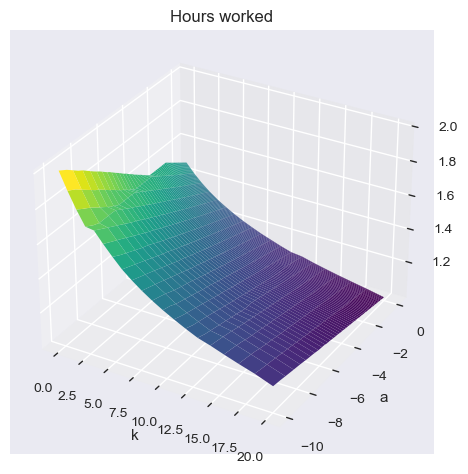

In [22]:
modelbank[id]['baseline'].plot_policy(5,n=1)

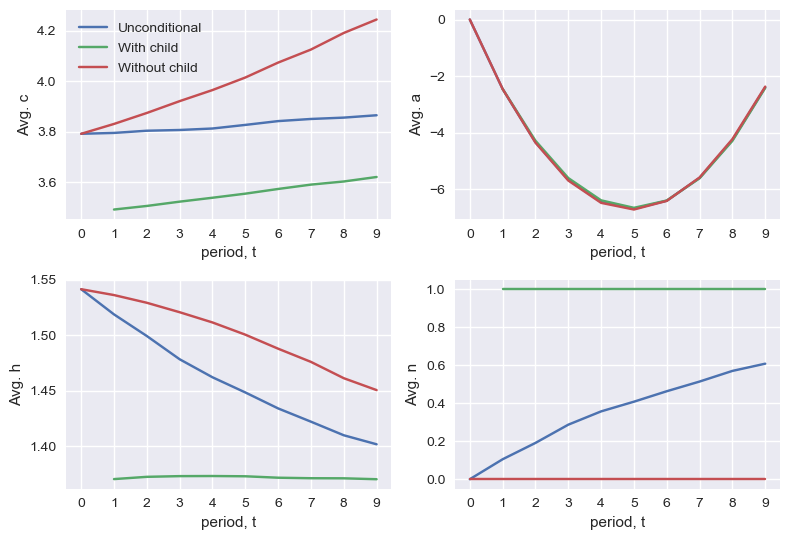

In [23]:
model.plot_behavior()

## Question 2

In [24]:
if load:
    modelbank[id]['tax_increase'] = model = DynLaborFertModelClass(name='Q2', load=True)

else:
    modelbank[id]['tax_increase'] = model = DynLaborFertModelClass(name='Q2',par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
    model.solve()
    model.simulate()
    model.save()  

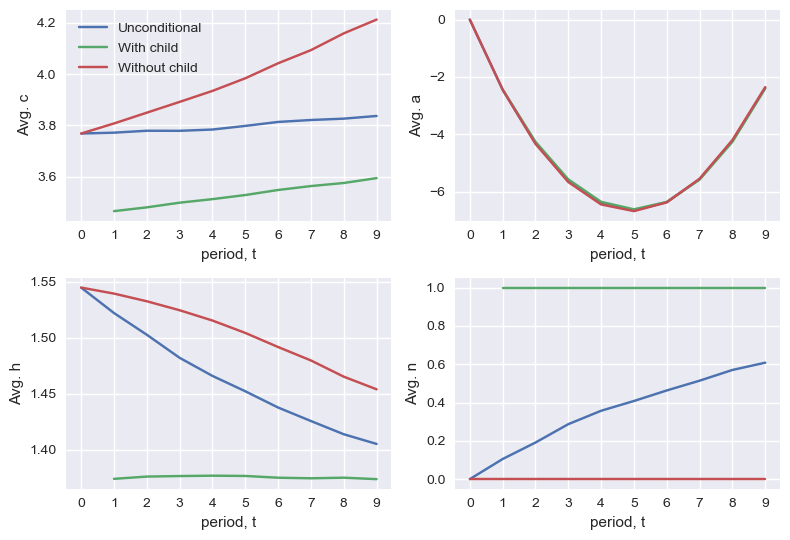

In [25]:
modelbank[id]['tax_increase'].plot_behavior()

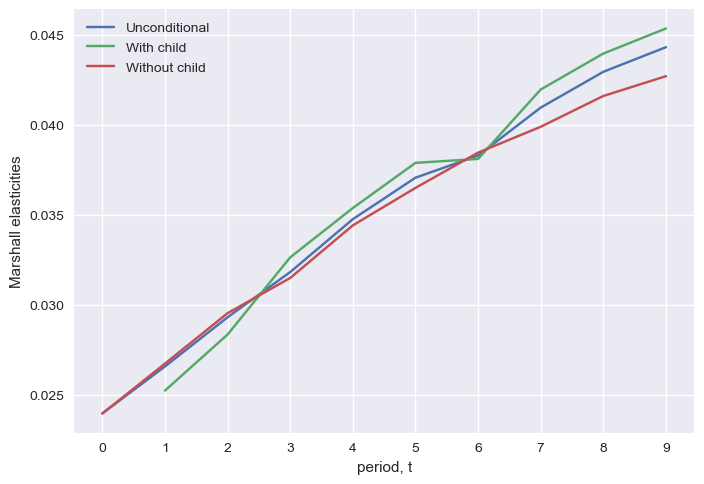

In [9]:
marshall_short(modelbank, id, dtau=dtau)

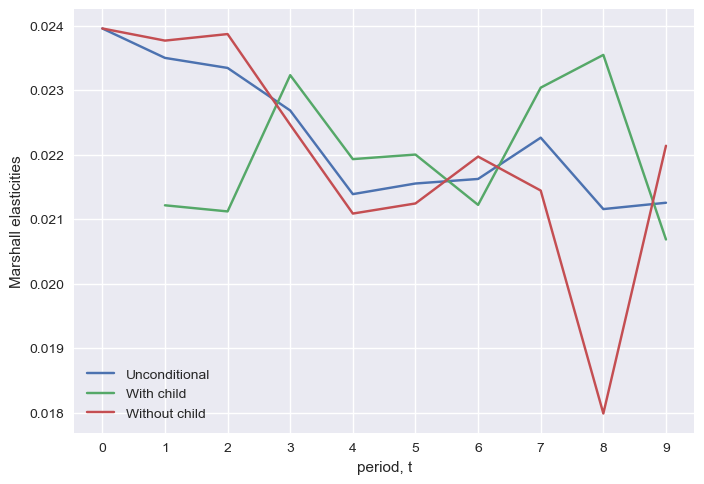

In [10]:
marshall_long(modelbank, id, dtau=dtau)

# Question 3

In [27]:
modelbank[153] = {}
if load:
    modelbank[153]['baseline'] = model = DynLaborFertModelClass(name='Q3b', load=True)
else:
    modelbank[153]['baseline'] = model = DynLaborFertModelClass(name='Q3b', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01})
    model.solve()
    model.simulate()
    model.save()

if load:
    modelbank[153]['tax_increase'] = model = DynLaborFertModelClass(name='Q3s', load=True)
else:
    modelbank[153]['tax_increase'] = model = DynLaborFertModelClass(name='Q3s',par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
    model.solve()
    model.simulate()
    model.save()

TypeError: _vhstack_dispatcher() missing 2 required keyword-only arguments: 'dtype' and 'casting'

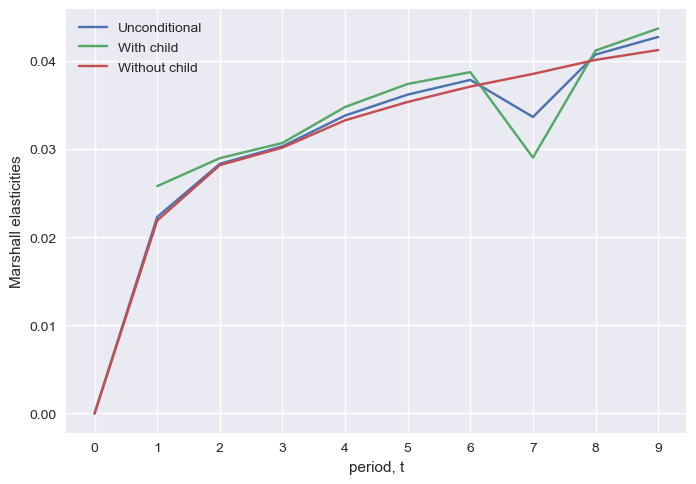

In [ ]:
marshall_short(modelbank, 153, dtau=dtau)

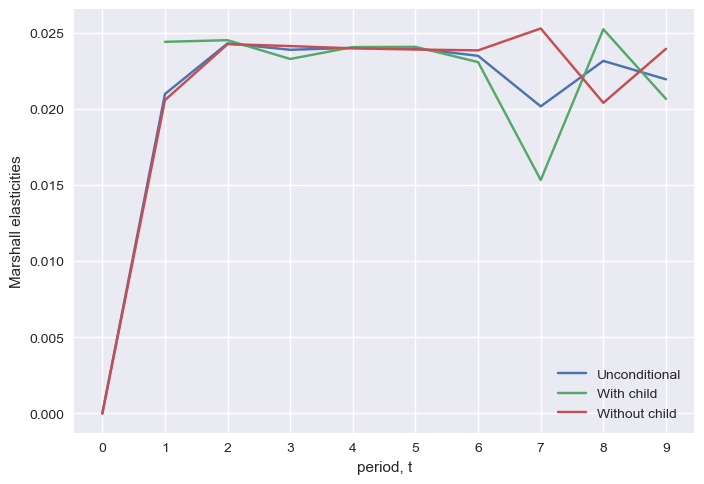

In [ ]:
marshall_long(modelbank, 153, dtau=dtau)

# Question 4

In [14]:
modelbank[5153] = {}
if load:
    modelbank[5153]['baseline'] = model = DynLaborFertModelClass(name='Q4b', load=True)
else:
    modelbank[5153]['baseline'] = model = DynLaborFertModelClass(name='Q4b', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05})
    model.solve()
    model.simulate()
    model.save()

if load:
    modelbank[5153]['tax_increase'] = model = DynLaborFertModelClass(name='Q4s', load=True)
else:
    modelbank[5153]['tax_increase'] = model = DynLaborFertModelClass(name='Q4s', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
    model.solve()
    model.simulate()
    model.save()

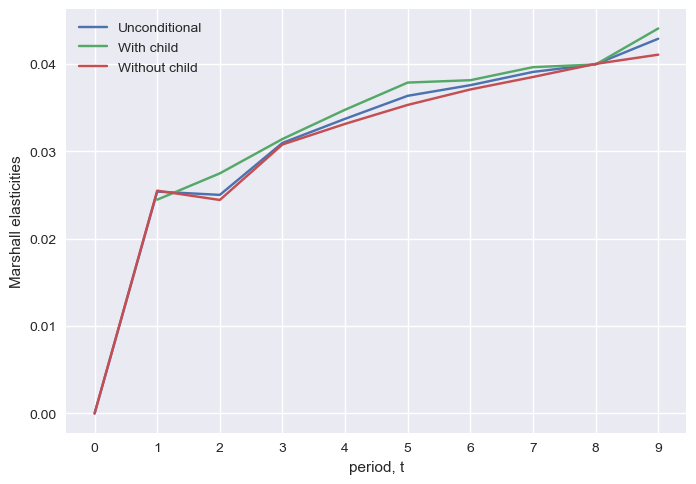

In [15]:
marshall_short(modelbank, 5153, dtau=dtau)

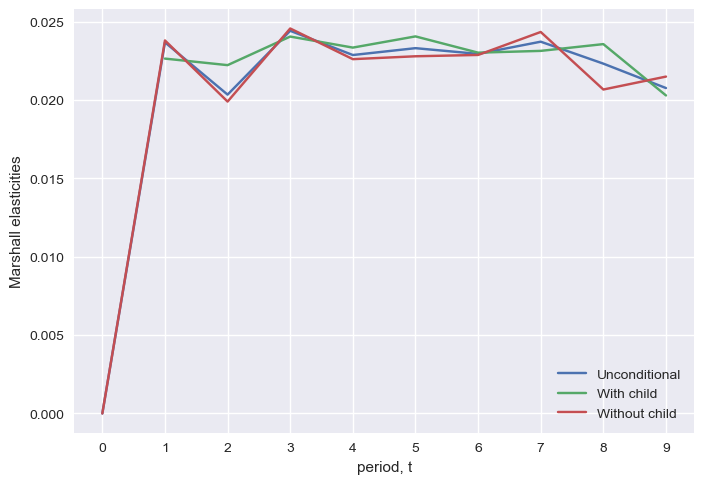

In [16]:
marshall_long(modelbank, 5153, dtau=dtau)

# Question 5

# Question 6

In [17]:
modelbank[85153] = {}
if load:
    modelbank[85153]['baseline'] = model = DynLaborFertModelClass(name='Q6b', load=True)
else:
    modelbank[85153]['baseline'] = model = DynLaborFertModelClass(name='Q6b', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05, 'p_spouse': 0.8})
    model.solve()
    model.simulate()
    model.save()

if load:
    modelbank[85153]['tax_increase'] = model = DynLaborFertModelClass(name='Q6s', load=True)
else:
    modelbank[85153]['tax_increase'] = model = DynLaborFertModelClass(name='q6s', par={'T':10,'r':0.02,'rho':1/(1.02),'alpha':0.3, 'beta_1': modelbank[id]['baseline'].par.beta_1, 'spouse_base':0.1, 'spouse_time':0.01, 'childcost': 0.05, 'p_spouse': 0.8, 'tau': modelbank[id]['baseline'].par.tau*(1+dtau)})
    model.solve()
    model.simulate()
    model.save()

KeyboardInterrupt: 

In [ ]:
marshall_short(modelbank, 85153, dtau=dtau)

In [ ]:
marshall_long(modelbank, 85153, dtau=dtau)

Make plots that compare all models

In [ ]:
plot_compare_behavior(modelbank,[53,153,5153,85153],['baseline','spouse','child cost','stochastic spouse'])

In [ ]:
plot_compare_marshall(modelbank,[53,153,5153,85153],['baseline','spouse','childcost','stochastic spouse'],dtau)